In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LinearRegression

## Create an imaginary dataset with n observations

In [3]:
n = 100_000

# to ensure that the results are reproducible
np.random.seed(0)

# create arrays for the size of the house, the number of bedrooms, and the age of the house
size = np.abs(np.random.normal(2000, 500, n))
bedrooms = np.random.randint(1, 6, n)
age = np.abs(np.random.normal(20, 5, n))

In [4]:
'''
A normal distribution is defined by two parameters: the mean (μ) and the standard deviation (σ).
The mean is the central value or average of the distribution, while the standard deviation measures
how spread out the distribution is from the mean.
'''
# normal distribution with a mean of 2000 and standard deviation of 500
print(size.mean(), size.std())
print(size)

2000.8079372826817 498.59124926927626
[2882.02617298 2200.07860418 2489.36899205 ... 2363.09099035 1416.08473962
 1357.39617621]


In [5]:
# normal distribution with a mean of 20 and standard deviation of 5
print(age.mean(), age.std())
print(age)

20.006633208816236 4.991422505950919
[25.18133463 13.92667884 17.54298455 ... 20.21898441 15.96959037
 17.56002453]


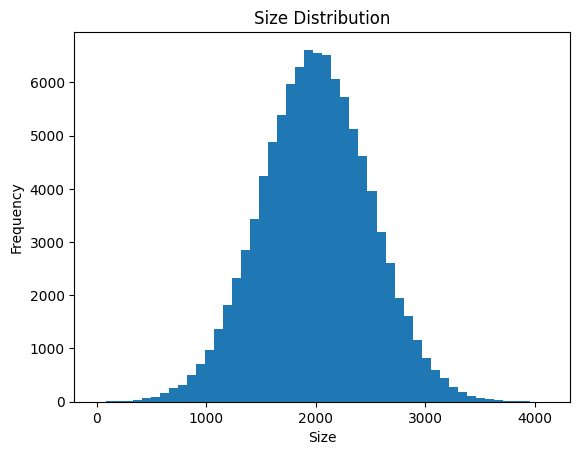

In [6]:
# generates a histogram of the size data
plt.hist(size, bins=50)
plt.title("Size Distribution")
plt.xlabel("Size")
plt.ylabel("Frequency")
plt.show()

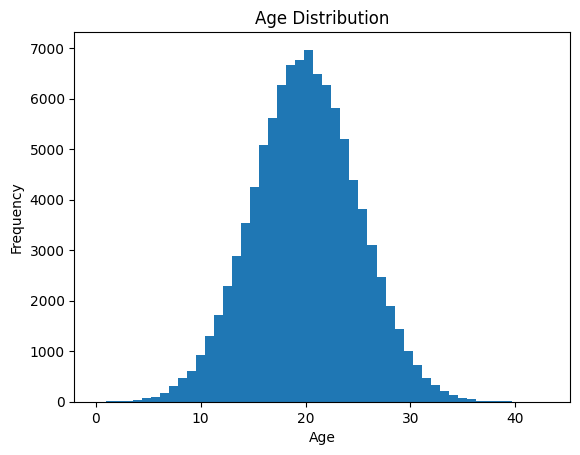

In [7]:
# generates a histogram of the age data
plt.hist(age, bins=50)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [8]:
# price = 50,000 + 100 * size + 5,000 * bedrooms - 1,000 * age + error
price = 50000 + 100 * size + 5000 * bedrooms - 1000 * age + np.abs(np.random.normal(0, 25_000, n))

def get_house_price(size, bedrooms, age):
    return 50000 + 100 * size + 5000 * bedrooms - 1000 * age + np.abs(np.random.randint(0, 25_000))

## Create a pandas data frame with the predictor and target variables

In [9]:
df = pd.DataFrame({'size': size, 'bedrooms': bedrooms, 'age': age, 'price': price})
df.head()

,size,bedrooms,age,price
0,2882.026173,4,25.181335,360857.903674
1,2200.078604,3,13.926679,300144.748287
2,2489.368992,3,17.542985,312738.660250
3,3120.446600,4,24.189057,367501.183529
4,2933.778995,4,21.724270,371032.654890


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   size      100000 non-null  float64
 1   bedrooms  100000 non-null  int32  
 2   age       100000 non-null  float64
 3   price     100000 non-null  float64
dtypes: float64(3), int32(1)
memory usage: 2.7 MB


In [11]:
df.describe()

,size,bedrooms,age,price
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,2000.807937,2.999310,20.006633,265002.298740
std,498.593742,1.416986,4.991447,52794.983400
min,3.519466,1.000000,0.101225,31550.733443
25%,1665.679152,2.000000,16.636390,229541.364437
50%,2000.860111,3.000000,19.995140,264777.768444
75%,2336.719350,4.000000,23.381887,300389.462226
max,4120.885956,5.000000,43.116869,498399.754460


## Multiple Linear Regression Model Fitting

In [12]:
X = df[['size', 'bedrooms', 'age']] # independent variables 
y = df['price'] # dependent variable

In [13]:
X

,size,bedrooms,age
0,2882.026173,4,25.181335
1,2200.078604,3,13.926679
2,2489.368992,3,17.542985
3,3120.446600,4,24.189057
4,2933.778995,4,21.724270
...,...,...,...
99995,1831.142620,4,19.152133
99996,985.725782,3,24.992696
99997,2363.090990,2,20.218984
99998,1416.084740,2,15.969590


In [14]:
y

0        360857.903674
1        300144.748287
2        312738.660250
3        367501.183529
4        371032.654890
             ...      
99995    246079.560008
99996    151016.058914
99997    303232.211472
99998    196612.431821
99999    190321.055971
Name: price, Length: 100000, dtype: float64

In [15]:
'''
The model.fit(X, y) function is used to fit the multiple linear regression model to the data,
with X as the independent variable and y as the dependent variable. Once the model is fitted, it can
be used to make predictions or analyze the relationships between the variables.
'''
# fit a multiple linear regression model to the data
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [16]:
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: 69619.26686521285
Coefficients: [ 100.08739594 5013.80677751 -995.19918891]


## Predict the price of a new house with size=2500, bedrooms=4, and age=15

In [17]:
new_house = pd.DataFrame([[2500, 4, 15]], columns=['size', 'bedrooms', 'age'])
new_house

,size,bedrooms,age
0,2500,4,15


In [18]:
print('Predicted price:', model.predict(new_house))
print('Actual price:', get_house_price(2500, 4, 15))

Predicted price: [324964.99598195]
Actual price: 326636


## Add missing values to dataset before saving to disk

In [19]:
df_orig = df
df_to_save = df.copy()
for col in ['size', 'bedrooms', 'age']:
    # set values to None
    indices = df_to_save.sample(n=1000).index
    df_to_save.loc[indices, [col]] = None

In [20]:
df_to_save.describe()

,size,bedrooms,age,price
count,99000.000000,99000.000000,99000.000000,100000.000000
mean,2000.695825,3.000303,20.007741,265002.298740
std,498.672536,1.416768,4.992480,52794.983400
min,3.519466,1.000000,0.101225,31550.733443
25%,1665.759515,2.000000,16.636846,229541.364437
50%,2000.914181,3.000000,19.997042,264777.768444
75%,2336.678626,4.000000,23.384564,300389.462226
max,4120.885956,5.000000,43.116869,498399.754460


In [21]:
df_orig.describe()

,size,bedrooms,age,price
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,2000.807937,2.999310,20.006633,265002.298740
std,498.593742,1.416986,4.991447,52794.983400
min,3.519466,1.000000,0.101225,31550.733443
25%,1665.679152,2.000000,16.636390,229541.364437
50%,2000.860111,3.000000,19.995140,264777.768444
75%,2336.719350,4.000000,23.381887,300389.462226
max,4120.885956,5.000000,43.116869,498399.754460


In [22]:
df_to_save.to_csv('Problem-1.data', index=False, sep='|', na_rep='?')

# ⭐ Solution [Problem-1]

In [23]:
df = pd.read_csv('Problem-1.data', sep='|', na_values='?')

## EDA

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   size      99000 non-null   float64
 1   bedrooms  99000 non-null   float64
 2   age       99000 non-null   float64
 3   price     100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB


In [25]:
df.describe()

,size,bedrooms,age,price
count,99000.000000,99000.000000,99000.000000,100000.000000
mean,2000.695825,3.000303,20.007741,265002.298740
std,498.672536,1.416768,4.992480,52794.983400
min,3.519466,1.000000,0.101225,31550.733443
25%,1665.759515,2.000000,16.636846,229541.364437
50%,2000.914181,3.000000,19.997042,264777.768444
75%,2336.678626,4.000000,23.384564,300389.462226
max,4120.885956,5.000000,43.116869,498399.754460


#### Looking for Correlations

In [26]:
corr_mat = df.corr()
corr_mat

,size,bedrooms,age,price
size,1.000000,-0.006964,-0.002370,0.944480
bedrooms,-0.006964,1.000000,0.000649,0.128101
age,-0.002370,0.000649,1.000000,-0.095741
price,0.944480,0.128101,-0.095741,1.000000


In [27]:
corr_mat['price'].sort_values(ascending=False)

price       1.000000
size        0.944480
bedrooms    0.128101
age        -0.095741
Name: price, dtype: float64

In [28]:
def strong_corr(df, label):
    corr_mat = df.corr()
    strong_corr = corr_mat[label].abs().sort_values(ascending=False)
    strong_corr = strong_corr[strong_corr >= .5]
    return corr_mat[label][strong_corr.index]

from pandas.plotting import scatter_matrix
def strong_corr_scatter(df, label):
    scatter_matrix(df[strong_corr(df, label).index], figsize=(12,8));

In [29]:
print(type(strong_corr(df, 'price')))
strong_corr(df, 'price')

<class 'pandas.core.series.Series'>


price    1.00000
size     0.94448
Name: price, dtype: float64

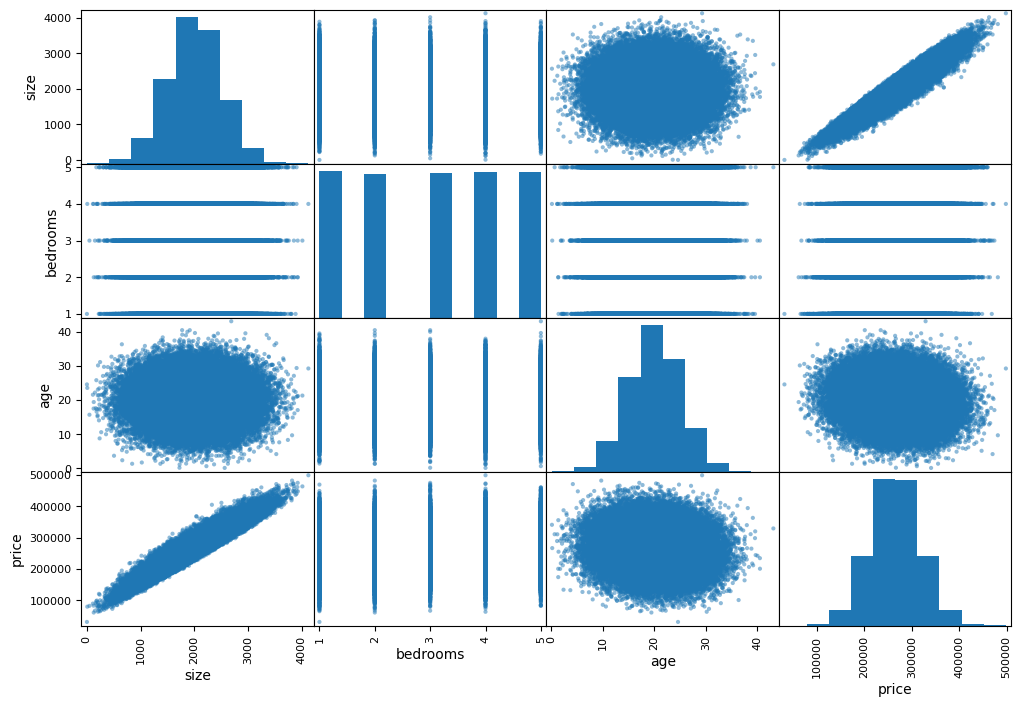

In [30]:
scatter_matrix(df, figsize=(12,8));

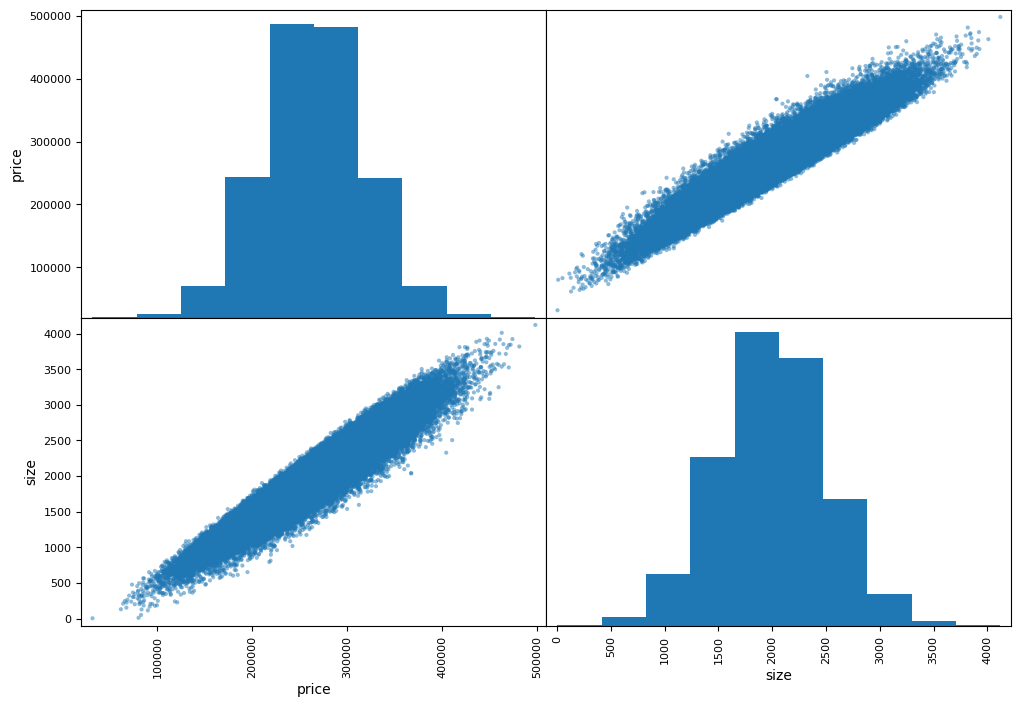

In [31]:
strong_corr_scatter(df, 'price')

## Creating a pipeline

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [34]:
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    # ...
    ('std_scaler', StandardScaler())
])

In [36]:
df = pd.DataFrame(my_pipeline.fit_transform(df), columns=df.columns)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   size      100000 non-null  float64
 1   bedrooms  100000 non-null  float64
 2   age       100000 non-null  float64
 3   price     100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB


## Train-test Splitting

In [37]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_indices, test_indices in split.split(df, df['bedrooms']):
    strat_train_set = df.loc[train_indices]
    strat_test_set = df.loc[test_indices]

In [38]:
strat_train_set

,size,bedrooms,age,price
89860,-0.109244,1.418570,0.643854,0.356231
31300,-0.553726,0.709178,-0.130625,-0.535769
72550,-0.873687,-1.418995,-1.144544,-0.221562
94432,-0.651244,-0.709604,1.273164,-1.204193
60113,0.480080,-0.709604,0.164394,0.023247
...,...,...,...,...
88458,0.627972,1.418570,0.185428,0.971622
80514,-1.010861,1.418570,-0.414160,-0.643713
33710,0.146078,-0.709604,0.254774,-0.148524
74092,-0.857518,0.709178,-1.700881,-0.371761


In [39]:
strat_test_set

,size,bedrooms,age,price
84266,-0.271456,0.709178,0.110186,-0.443422
93295,0.470251,0.709178,-0.154760,0.714291
2210,-0.857033,-1.418995,1.417606,-1.051610
67903,0.126743,0.709178,0.342081,-0.189178
88008,1.103335,-1.418995,0.236456,0.851793
...,...,...,...,...
15796,-1.008640,1.418570,0.738395,-1.044014
40953,0.342803,-1.418995,0.423104,0.317114
54622,0.579792,-1.418995,2.786846,0.002856
28513,-0.697379,-1.418995,-1.183354,-0.980442


In [49]:
X_train = strat_train_set.drop('price', axis=1)
X_train

,size,bedrooms,age
89860,-0.109244,1.418570,0.643854
31300,-0.553726,0.709178,-0.130625
72550,-0.873687,-1.418995,-1.144544
94432,-0.651244,-0.709604,1.273164
60113,0.480080,-0.709604,0.164394
...,...,...,...
88458,0.627972,1.418570,0.185428
80514,-1.010861,1.418570,-0.414160
33710,0.146078,-0.709604,0.254774
74092,-0.857518,0.709178,-1.700881


In [50]:
y_train = strat_train_set['price'].copy()
y_train

89860    0.356231
31300   -0.535769
72550   -0.221562
94432   -1.204193
60113    0.023247
           ...   
88458    0.971622
80514   -0.643713
33710   -0.148524
74092   -0.371761
51512   -1.252465
Name: price, Length: 80000, dtype: float64

In [51]:
X_test = strat_test_set.drop('price', axis=1)
X_test

,size,bedrooms,age
84266,-0.271456,0.709178,0.110186
93295,0.470251,0.709178,-0.154760
2210,-0.857033,-1.418995,1.417606
67903,0.126743,0.709178,0.342081
88008,1.103335,-1.418995,0.236456
...,...,...,...
15796,-1.008640,1.418570,0.738395
40953,0.342803,-1.418995,0.423104
54622,0.579792,-1.418995,2.786846
28513,-0.697379,-1.418995,-1.183354


In [52]:
y_test = strat_test_set['price'].copy()
y_test

84266   -0.443422
93295    0.714291
2210    -1.051610
67903   -0.189178
88008    0.851793
           ...   
15796   -1.044014
40953    0.317114
54622    0.002856
28513   -0.980442
75957    0.657906
Name: price, Length: 20000, dtype: float64

## Selection of desired model

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

model = LinearRegression()
# model = DecisionTreeRegressor()
# model = RandomForestRegressor()


model.fit(X_train, y_train)

LinearRegression()

In [66]:
y_test_predicted = model.predict(X_test)
y_test_predicted

array([-0.17020543,  0.55190931, -1.12954812, ...,  0.09308626,
       -0.73595193,  0.75667315])

## Using the model

In [61]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test_predicted, y_test)
rmse = np.sqrt(mse)

In [67]:
mse

0.09106800053341345

In [72]:
my_pipeline.inverse_transform([[mse]])

ValueError: non-broadcastable output operand with shape (1,1) doesn't match the broadcast shape (1,4)